Jack in the box: Exploratory recommender system with explanations

In [ ]:
!pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from sklearn.tree import export_text
from IPython.display import Audio
from gtts import gTTS
import statistics


In [ ]:
movies_data = pd.read_csv("/content/sample_data/movielens/movies.csv")

In [ ]:
movies_data.shape

(9742, 3)

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
movies_data.genres.value_counts()

Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: genres, Length: 951, dtype: int64

In [ ]:
x = movies_data.genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    movies_data[i] = 0
for i in b:
    movies_data.loc[movies_data['genres'].str.contains(i), i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
movies_data.columns

Index(['movieId', 'title', 'genres', 'Adventure', 'Comedy', 'Action', 'Drama',
       'Crime', 'Children', 'Mystery', 'Animation', 'Documentary', 'Thriller',
       'Horror', 'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi',
       'Musical', 'War', '(no genres listed)'],
      dtype='object')

In [ ]:
genres = ['Adventure', 'Comedy', 'Action', 'Drama',
       'Crime', 'Children', 'Mystery', 'Animation', 'Documentary', 'Thriller',
       'Horror', 'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi',
       'Musical', 'War'] 

In [ ]:
movies_data_clean = movies_data[movies_data.genres != "(no genres listed)"]

In [ ]:
movies_data_for_kmeans = movies_data_clean[genres]

In [ ]:
movies_data_for_kmeans.shape

(9708, 18)

In [ ]:
interia = []
for k in range(2, 500):

  km_model = KMeans(n_clusters = k)
  km_target = km_model.fit_predict(movies_data_for_kmeans)
  movies_data_for_kmeans["cluster"] = km_target
  cluster_size_data =movies_data_for_kmeans["cluster"].value_counts()
  cluster_size_by_index = movies_data_for_kmeans["cluster"].value_counts().sort_index()
  interia.append(km_model.inertia_)

In [ ]:
len(interia)

317

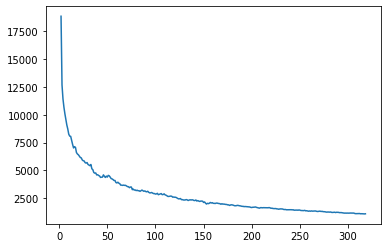

In [ ]:
X = range(2, 319)
plt.plot(X,interia )

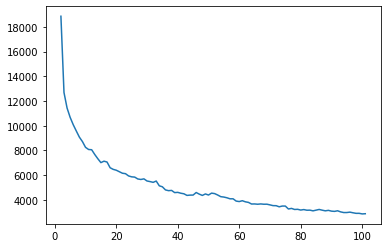

In [ ]:
plt.plot(X[:100],interia[:100] )

Hence, we take 40 as optimal number of clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy =  0.5909559126493613
Tree depth =  4
Tree leaves =  15


[Text(0.45535714285714285, 0.9, 'X[1] <= 0.5\ngini = 0.944\nsamples = 9708\nvalue = [194, 203, 497, 1305, 1254, 169, 424, 580, 268, 381\n181, 174, 173, 140, 218, 334, 175, 54, 470, 67\n169, 167, 77, 154, 236, 108, 72, 92, 166, 155, 120\n85, 176, 104, 44, 98, 87, 104, 117, 116]'),
 Text(0.19642857142857142, 0.7, 'X[3] <= 0.5\ngini = 0.922\nsamples = 5952\nvalue = [178, 183, 0, 1305, 0, 159, 422, 0, 268, 381, 164\n160, 12, 109, 201, 0, 155, 52, 470, 57, 45, 167\n0, 49, 208, 102, 17, 92, 33, 142, 118, 77, 176\n104, 39, 7, 83, 101, 0, 116]'),
 Text(0.10714285714285714, 0.5, 'X[8] <= 0.5\ngini = 0.935\nsamples = 2604\nvalue = [165, 5, 0, 0, 0, 127, 87, 0, 259, 381, 153, 0\n12, 98, 0, 0, 155, 49, 0, 51, 41, 0, 0, 49\n204, 17, 11, 75, 33, 128, 0, 77, 0, 104, 33, 7\n83, 84, 0, 116]'),
 Text(0.07142857142857142, 0.3, 'X[10] <= 0.5\ngini = 0.94\nsamples = 2223\nvalue = [165, 5, 0, 0, 0, 127, 87, 0, 259, 0, 153, 0\n12, 98, 0, 0, 155, 49, 0, 51, 41, 0, 0, 49\n204, 17, 11, 75, 33, 128, 0, 77, 0, 10

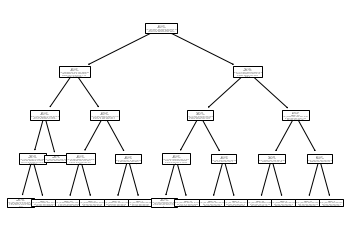

In [ ]:
km_model = KMeans(n_clusters = 40)
km_target = km_model.fit_predict(movies_data_for_kmeans)
movies_data_for_kmeans["cluster"] = km_target
cluster_size_data =movies_data_for_kmeans["cluster"].value_counts()
cluster_size_by_index = movies_data_for_kmeans["cluster"].value_counts().sort_index()


X = movies_data_for_kmeans[genres]
movie_tree = DecisionTreeClassifier(max_depth= 4)
tree_model = movie_tree.fit(X, km_target)
  
tree_predict = tree_model.predict(X)
acc = sklearn.metrics.accuracy_score(km_target,tree_predict)
print("Accuracy = ", acc)
print("Tree depth = ", tree_model.tree_.max_depth)
print("Tree leaves = ", tree_model.tree_.n_leaves)
tree.plot_tree(tree_model)

In [ ]:
cl = []
for i in range(0, 40):
  cl.append(str(i))

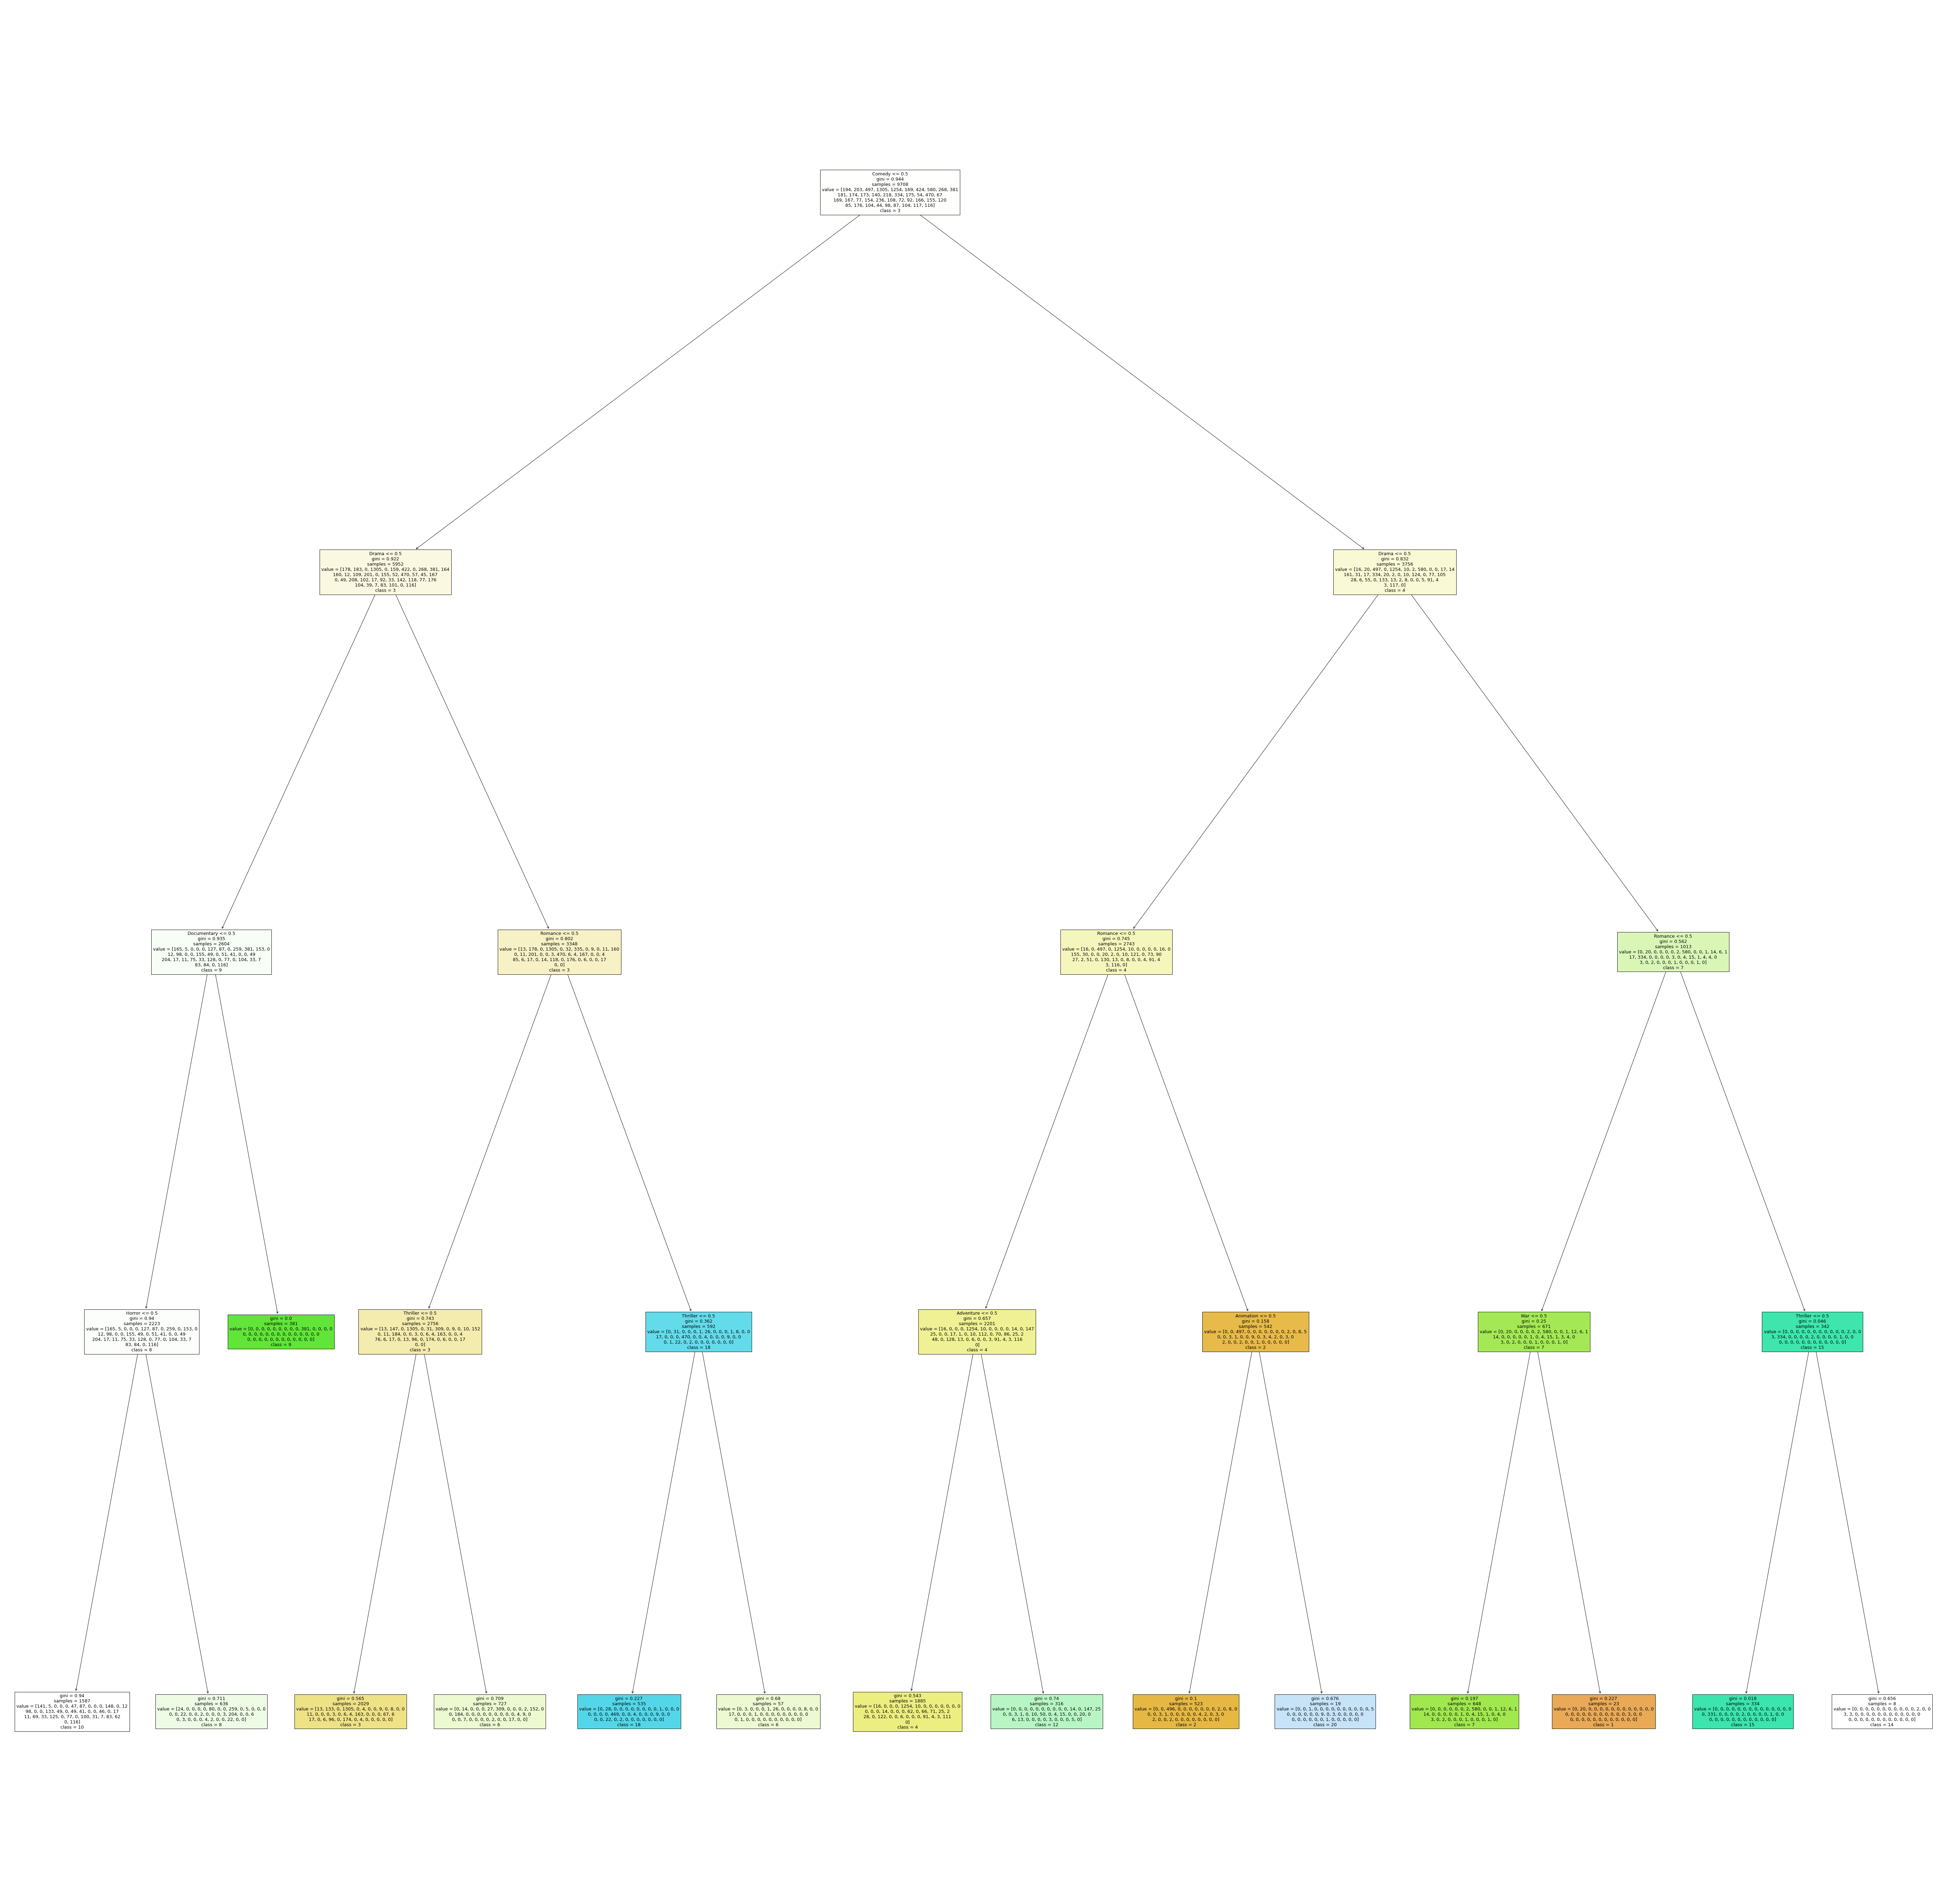

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(tree_model, 
                   feature_names=genres,  
                   class_names= cl,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

In [ ]:
movies_data_clean['cluster'] = km_target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
movies_data_clean.head()

,movieId,title,genres,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,...,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,(no genres listed),cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,7
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,14
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
#Random shuffle movies and show 10 movies
import random
random_list = random.sample(range(0, 9708), 10)
i = 1
for x in random_list:
  print(str(i)+".  " + movies_data_clean.iloc[x,1])
  i = i+1

1.  Stripes (1981)
2.  Parasite (1982)
3.  Robin Hood: Prince of Thieves (1991)
4.  Helvetica (2007)
5.  Cabaret (1972)
6.  Wow! A Talking Fish! (1983)
7.  Dunston Checks In (1996)
8.  Sabrina (1954)
9.  Little Boxes (2017)
10.  Our Town (1940)


In [ ]:
sel_mov = input("Select any movie: ")

Select any movie: 6


In [ ]:
sel_mov_kmeans = random_list[int(sel_mov)]

kmeans_cluster = movies_data_clean.iloc[sel_mov_kmeans].cluster

kmeans_cluster

31

In [ ]:
#Adventure|Drama

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
centroids = km_model.cluster_centers_

In [ ]:
min = 0
for cent in range(0,len(centroids)):

  simi = cosine(centroids[kmeans_cluster], centroids[cent])
  if simi > min:
    min = simi
    explore_cluster = cent 

In [ ]:
explore_mov = movies_data_clean[movies_data_clean['cluster'] == explore_cluster].index.to_list()

In [ ]:
import random
jack_title_basket = []
random.shuffle(explore_mov)
jack_basket = []
for i in range(0, 10):
  jack_title_basket.append(movies_data_clean.iloc[explore_mov[i]].title)

In [ ]:
jack_title_basket

['Foreign Correspondent (1940)',
 "No Man's Land (1987)",
 'Man Who Shot Liberty Valance, The (1962)',
 'Short Film About Killing, A (Krótki film o zabijaniu) (1988)',
 'Species III (2004)',
 'Creed (2015)',
 'Bad Lieutenant: Port of Call New Orleans (2009)',
 'Cradle 2 the Grave (2003)',
 "Porky's Hare Hunt (1938)",
 "Child, The (L'enfant) (2005)"]

In [ ]:
jack_sel = explore_mov[0]

 

In [ ]:
jack_sel_title = movies_data_clean.iloc[jack_sel].title
jack_sel_title

'Cruise, The (1998)'

In [ ]:
movies_data_clean[movies_data_clean['cluster'] == explore_cluster]

,movieId,title,genres,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,...,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,(no genres listed),cluster
69,77,Nico Icon (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
96,108,Catwalk (1996),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
101,116,Anne Frank Remembered (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
110,128,Jupiter's Wife (1994),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,184257,Making a Murderer (2015),Crime|Documentary,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
9711,187717,Won't You Be My Neighbor? (2018),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9719,189111,Spiral (2018),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
import numpy as np

In [ ]:
estimator = movie_tree

In [ ]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

node_indicator = estimator.decision_path(X)

leave_id = estimator.apply(X)



The binary tree structure has 31 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 0.5 else to node 16.
	node=1 test node: go to node 2 if X[:, 3] <= 0.5 else to node 9.
		node=2 test node: go to node 3 if X[:, 8] <= 0.5 else to node 6.
			node=3 test node: go to node 4 if X[:, 10] <= 0.5 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 test node: go to node 7 if X[:, 16] <= 0.5 else to node 8.
				node=7 leaf node.
				node=8 leaf node.
		node=9 test node: go to node 10 if X[:, 14] <= 0.5 else to node 13.
			node=10 test node: go to node 11 if X[:, 9] <= 0.5 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 9] <= 0.5 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 3] <= 0.5 else to node 24.
		node=17 test node: go to node 18 if X[:, 14] <= 0.5 else to node 21.
			node=18 test node: go to node 19 if X[:, 2] <= 0.5 

In [ ]:
random.shuffle(explore_mov)

In [ ]:
reco_movies = explore_mov[0:20]
reco_movies 


In [ ]:
df_res = pd.DataFrame(columns = ["Movie Title", "Exploratory", "Exploitation"])

In [ ]:
#sample_id = jack_sel

for sample_id in reco_movies:
  jacks_share = []
  jacks_ignore = []

  node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                      node_indicator.indptr[sample_id + 1]]

  print('Rules used to predict sample %s: ' % movies_data_clean.iloc[sample_id].title)
  for node_id in node_index:

      if leave_id[sample_id] == node_id:  
          print("leaf node {} reached, no decision here".format(leave_id[sample_id])) # <--

      else: # < -- added else to iterate through decision nodes

          node_val = X.iloc[sample_id, feature[node_id]]

          split = "exists"

          if node_val == 1:
            split = "exists"
            jacks_share.append(str(genres[feature[node_id]]))
          else:
            split = " does not exist"
            jacks_ignore.append(str(genres[feature[node_id]]))


  exp_list = [movies_data_clean.iloc[sample_id].title,jacks_share, jacks_ignore ]
  print(exp_list)
  df_res.loc[len(df_res)] = exp_list

Rules used to predict sample Cruise, The (1998): 
leaf node 7 reached, no decision here
['Cruise, The (1998)', ['Documentary'], ['Comedy', 'Drama', 'Musical']]
Rules used to predict sample Mortdecai (2015): 
leaf node 22 reached, no decision here
['Mortdecai (2015)', ['Comedy', 'Romance'], ['Drama', 'Action']]
Rules used to predict sample I Am Trying to Break Your Heart (2002): 
leaf node 7 reached, no decision here
['I Am Trying to Break Your Heart (2002)', ['Documentary'], ['Comedy', 'Drama', 'Musical']]
Rules used to predict sample GLOW: The Story of the Gorgeous Ladies of Wrestling (2012): 
leaf node 7 reached, no decision here
['GLOW: The Story of the Gorgeous Ladies of Wrestling (2012)', ['Documentary'], ['Comedy', 'Drama', 'Musical']]
Rules used to predict sample Hoop Dreams (1994): 
leaf node 7 reached, no decision here
['Hoop Dreams (1994)', ['Documentary'], ['Comedy', 'Drama', 'Musical']]
Rules used to predict sample Kid Stays in the Picture, The (2002): 
leaf node 7 reached,

In [ ]:
jacks_share

['Documentary']

In [ ]:
jacks_ignore

['Comedy', 'Drama', 'Musical']

In [ ]:
df_res.head()

,Movie Title,Exploratory,Exploitation
0,"Cruise, The (1998)",[Documentary],"[Comedy, Drama, Musical]"
1,Mortdecai (2015),"[Comedy, Romance]","[Drama, Action]"
2,I Am Trying to Break Your Heart (2002),[Documentary],"[Comedy, Drama, Musical]"
3,GLOW: The Story of the Gorgeous Ladies of Wres...,[Documentary],"[Comedy, Drama, Musical]"
4,Hoop Dreams (1994),[Documentary],"[Comedy, Drama, Musical]"


In [ ]:
df_res.Exploratory

0         [Documentary]
1     [Comedy, Romance]
2         [Documentary]
3         [Documentary]
4         [Documentary]
5         [Documentary]
6         [Documentary]
7         [Documentary]
8         [Documentary]
9              [Comedy]
10        [Documentary]
11        [Documentary]
12        [Documentary]
13        [Documentary]
14        [Documentary]
15        [Documentary]
16              [Drama]
17        [Documentary]
18                   []
19        [Documentary]
Name: Exploratory, dtype: object

In [ ]:
df_res.Exploitation

0                 [Comedy, Drama, Musical]
1                          [Drama, Action]
2                 [Comedy, Drama, Musical]
3                 [Comedy, Drama, Musical]
4                 [Comedy, Drama, Musical]
5                 [Comedy, Drama, Musical]
6                 [Comedy, Drama, Musical]
7                 [Comedy, Drama, Musical]
8                 [Comedy, Drama, Musical]
9                 [Drama, Romance, Action]
10                [Comedy, Drama, Musical]
11                [Comedy, Drama, Musical]
12                [Comedy, Drama, Musical]
13                [Comedy, Drama, Musical]
14                [Comedy, Drama, Musical]
15                [Comedy, Drama, Musical]
16             [Comedy, Romance, Thriller]
17                [Comedy, Drama, Musical]
18    [Comedy, Drama, Documentary, Horror]
19                [Comedy, Drama, Musical]
Name: Exploitation, dtype: object

In [ ]:
df_res.to_csv("result2.csv")

In [ ]:
from IPython.display import Audio
from gtts import gTTS

text = "I am Jack in the box! I have something which you can explore." 

movie_name = jack_sel_title

genre_text = "because I think you can explore :" 

genre_list = ""



for genre in jacks_share:
  genre_list += str(genre) + ","



tts = gTTS(text + movie_name + genre_text + genre_list, lang = "en")
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)
